# t-sne using scikit learn

In [1]:
#https://www.kaggle.com/c/digit-recognizer/data
# MNIST dataset downloaded from Kaggle : 
# Functions to read and show images.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sn

In [2]:
data = pd.read_csv('train.csv')

In [3]:
l=data['label']

In [4]:
data = data.drop("label",axis=1)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


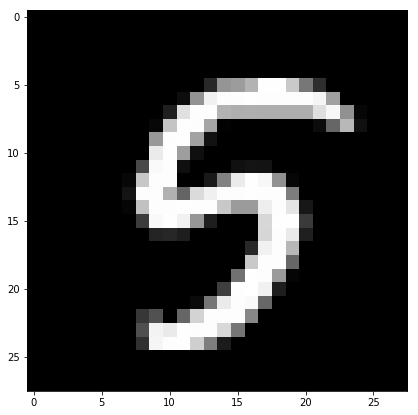

5


In [5]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 8

grid_data = data.iloc[idx].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

In [6]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(42000, 784)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [7]:
sample_data = standardized_data

In [8]:
Model=TSNE(n_components=2,random_state=0,perplexity=100,learning_rate=250)
#configuring the parameters
#the number of components=2
#Default perplexity=30
#Default learning_rate=200
#Default Maximum number of iterations for optimization=1000

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


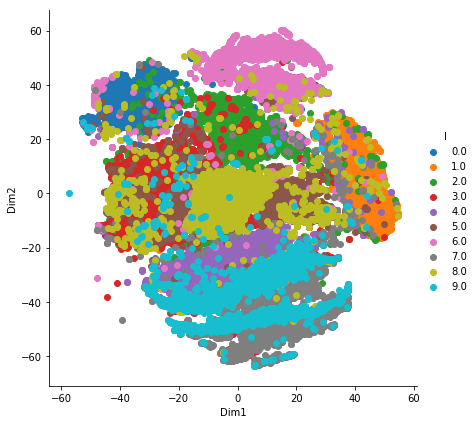

In [9]:
tsne_data=Model.fit_transform(sample_data)
# attaching the label for each 2-d data point 
tsne_data = np.vstack((tsne_data.T, l)).T

# creating a new data fram which help us in ploting the result data
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim1", "Dim2", "l"))

#plotting the result tsne
sn.FacetGrid(tsne_df, hue="l", size=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()